<a href="https://colab.research.google.com/github/Abijith-B/Git-hub-Data/blob/main/case_study_supervised.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Libraries

In [80]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix,classification_report,roc_auc_score
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.naive_bayes import GaussianNB #NB
from sklearn.tree import DecisionTreeClassifier #DT
from sklearn.svm import SVC #SVM
from sklearn.model_selection import GridSearchCV #model fine tuning
from sklearn.ensemble import RandomForestClassifier

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
filepath ='/content/drive/MyDrive/DSA ICT/Training_data.csv'
chu = pd.read_csv(filepath)
chu.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,9509-MPYOD,Female,0,No,No,35,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,20.75,700.45,No
1,7746-AWNQW,Female,0,No,No,28,No,No phone service,DSL,No,...,Yes,Yes,No,No,Month-to-month,Yes,Mailed check,35.75,961.4,No
2,2208-UGTGR,Male,0,No,No,56,Yes,Yes,Fiber optic,No,...,No,No,Yes,Yes,Month-to-month,No,Electronic check,98.60,5581.05,No
3,4884-LEVMQ,Male,0,Yes,No,39,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),20.45,790,No
4,6682-VCIXC,Female,0,Yes,Yes,43,No,No phone service,DSL,NaN,...,No,Yes,Yes,No,One year,Yes,Bank transfer (automatic),51.25,2151.6,No


In [4]:
chu.size

118314

#data cleaning

In [5]:
chu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5634 entries, 0 to 5633
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        5634 non-null   object 
 1   gender            5465 non-null   object 
 2   SeniorCitizen     5634 non-null   int64  
 3   Partner           5634 non-null   object 
 4   Dependents        5634 non-null   object 
 5   tenure            5634 non-null   int64  
 6   PhoneService      5634 non-null   object 
 7   MultipleLines     5634 non-null   object 
 8   InternetService   5634 non-null   object 
 9   OnlineSecurity    5465 non-null   object 
 10  OnlineBackup      5634 non-null   object 
 11  DeviceProtection  5634 non-null   object 
 12  TechSupport       5634 non-null   object 
 13  StreamingTV       5634 non-null   object 
 14  StreamingMovies   5634 non-null   object 
 15  Contract          5634 non-null   object 
 16  PaperlessBilling  5634 non-null   object 


In [6]:
chu.drop(columns=['customerID'],inplace=True)

In [7]:
chu.duplicated().sum()

np.int64(8)

In [8]:
#remove duplicates
chu.drop_duplicates(inplace = True)
chu.duplicated().sum()

np.int64(0)

In [9]:
#missing values
chu.isnull().sum()

,0
gender,169
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,169
OnlineBackup,0


In [10]:
chu = chu.dropna(subset = ['gender'])
chu['MonthlyCharges'] = chu['MonthlyCharges'].fillna(chu['MonthlyCharges'].median())


In [11]:
chu['OnlineSecurity'] =chu['OnlineSecurity'].fillna(chu['OnlineSecurity'].mode()[0])


In [12]:
chu['TotalCharges'] = pd.to_numeric(chu['TotalCharges'], errors='coerce')
chu['TotalCharges'].isnull().sum()

np.int64(283)

In [13]:
chu['TotalCharges'] = chu['TotalCharges'].fillna(chu['TotalCharges'].median())
chu.isnull().sum()

,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0
OnlineBackup,0


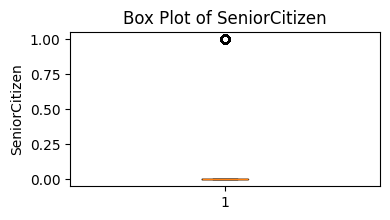

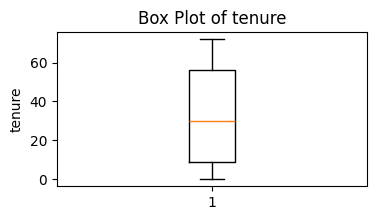

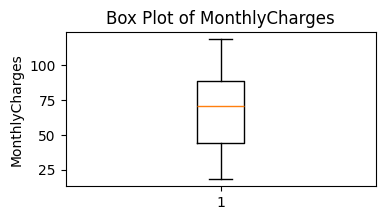

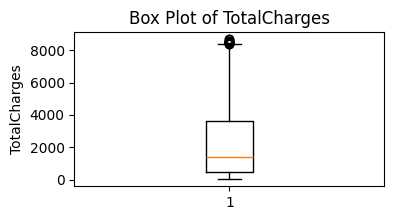

In [14]:
#Handling outliers
#checking outliers
num_cols = chu.select_dtypes(include=['int64','float64']).columns
for cols in num_cols:
    plt.figure(figsize=(4,2))
    plt.boxplot(chu[cols])
    plt.title(f'Box Plot of {cols}')
    plt.ylabel(cols)
    plt.show()

<Axes: >

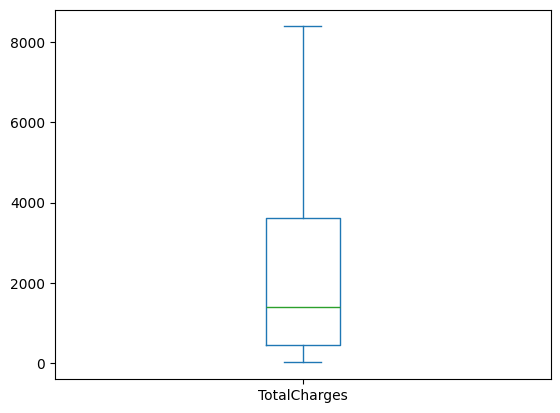

In [15]:
# without remove it limit the outlier
Q1=np.percentile(chu['TotalCharges'],25)
Q3=np.percentile(chu['TotalCharges'],75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR
chu['TotalCharges']=chu['TotalCharges'].clip(lower=lower,upper=upper)
chu['TotalCharges'].plot(kind='box')

In [16]:
chu.size

109140

#Feature engineering

In [17]:
chu1=chu.select_dtypes(include=['number'])
corr=chu1.corr()
corr

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
SeniorCitizen,1.000000,0.020826,0.204950,0.102177
tenure,0.020826,1.000000,0.229976,0.796700
MonthlyCharges,0.204950,0.229976,1.000000,0.606428
TotalCharges,0.102177,0.796700,0.606428,1.000000


<Axes: >

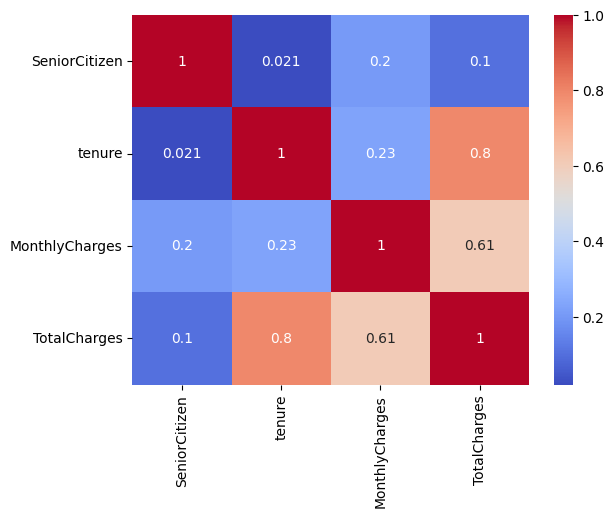

In [18]:
sns.heatmap(corr,annot = True, cmap='coolwarm')

In [19]:
chu['CLV'] = chu['tenure'] * chu['MonthlyCharges']
chu.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,CLV
0,Female,0,No,No,35,Yes,No,No,No internet service,No internet service,...,No internet service,No internet service,No internet service,One year,No,Mailed check,20.75,700.45,No,726.25
1,Female,0,No,No,28,No,No phone service,DSL,No,No,...,Yes,No,No,Month-to-month,Yes,Mailed check,35.75,961.40,No,1001.00
2,Male,0,No,No,56,Yes,Yes,Fiber optic,No,Yes,...,No,Yes,Yes,Month-to-month,No,Electronic check,98.60,5581.05,No,5521.60
3,Male,0,Yes,No,39,Yes,No,No,No internet service,No internet service,...,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),20.45,790.00,No,797.55
4,Female,0,Yes,Yes,43,No,No phone service,DSL,No,Yes,...,Yes,Yes,No,One year,Yes,Bank transfer (automatic),51.25,2151.60,No,2203.75


In [20]:
#average monthly spend
chu['AvgMonthlySpend'] = chu['TotalCharges'] / (chu['tenure'] + 1)
chu.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,CLV,AvgMonthlySpend
0,Female,0,No,No,35,Yes,No,No,No internet service,No internet service,...,No internet service,No internet service,One year,No,Mailed check,20.75,700.45,No,726.25,19.456944
1,Female,0,No,No,28,No,No phone service,DSL,No,No,...,No,No,Month-to-month,Yes,Mailed check,35.75,961.40,No,1001.00,33.151724
2,Male,0,No,No,56,Yes,Yes,Fiber optic,No,Yes,...,Yes,Yes,Month-to-month,No,Electronic check,98.60,5581.05,No,5521.60,97.913158
3,Male,0,Yes,No,39,Yes,No,No,No internet service,No internet service,...,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),20.45,790.00,No,797.55,19.750000
4,Female,0,Yes,Yes,43,No,No phone service,DSL,No,Yes,...,Yes,No,One year,Yes,Bank transfer (automatic),51.25,2151.60,No,2203.75,48.900000


In [21]:
#Tenure group
chu['TenureGroup'] = pd.cut(
    chu['tenure'],
    bins=[0, 12, 24, 48, 72],
    labels=['0-1yr', '1-2yr', '2-4yr', '4-6yr']
)

In [22]:
contract_weight = {
    'Month-to-month': 1,
    'One year': 12,
    'Two year': 24
}
chu['ContractWeight'] = chu['Contract'].map(contract_weight)
chu['Tenure_Contract'] = chu['tenure'] * chu['ContractWeight']

In [23]:
chu[['CLV', 'AvgMonthlySpend', 'TenureGroup','Tenure_Contract']].head()

,CLV,AvgMonthlySpend,TenureGroup,Tenure_Contract
0,726.25,19.456944,2-4yr,420
1,1001.00,33.151724,2-4yr,28
2,5521.60,97.913158,4-6yr,56
3,797.55,19.750000,2-4yr,936
4,2203.75,48.900000,2-4yr,516


#Encoding

In [24]:
for col in chu.columns:
    print(f"\nColumn: {col}")
    print(chu[col].value_counts(dropna=False))



Column: gender
gender
Male      2741
Female    2716
Name: count, dtype: int64

Column: SeniorCitizen
SeniorCitizen
0    4580
1     877
Name: count, dtype: int64

Column: Partner
Partner
No     2797
Yes    2660
Name: count, dtype: int64

Column: Dependents
Dependents
No     3837
Yes    1620
Name: count, dtype: int64

Column: tenure
tenure
1     458
72    296
2     182
3     149
4     137
     ... 
38     44
36     43
39     42
44     41
0       8
Name: count, Length: 73, dtype: int64

Column: PhoneService
PhoneService
Yes    4928
No      529
Name: count, dtype: int64

Column: MultipleLines
MultipleLines
No                  2608
Yes                 2320
No phone service     529
Name: count, dtype: int64

Column: InternetService
InternetService
Fiber optic    2407
DSL            1888
No             1162
Name: count, dtype: int64

Column: OnlineSecurity
OnlineSecurity
No                     2793
Yes                    1534
No internet service    1130
Name: count, dtype: int64

Column: Onl

In [25]:
chu.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5457 entries, 0 to 5632
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   gender            5457 non-null   object  
 1   SeniorCitizen     5457 non-null   int64   
 2   Partner           5457 non-null   object  
 3   Dependents        5457 non-null   object  
 4   tenure            5457 non-null   int64   
 5   PhoneService      5457 non-null   object  
 6   MultipleLines     5457 non-null   object  
 7   InternetService   5457 non-null   object  
 8   OnlineSecurity    5457 non-null   object  
 9   OnlineBackup      5457 non-null   object  
 10  DeviceProtection  5457 non-null   object  
 11  TechSupport       5457 non-null   object  
 12  StreamingTV       5457 non-null   object  
 13  StreamingMovies   5457 non-null   object  
 14  Contract          5457 non-null   object  
 15  PaperlessBilling  5457 non-null   object  
 16  PaymentMethod     5457 non-nu

##BINARY encoding

In [26]:
binary_cols = ['gender', 'Partner', 'Dependents', 'PhoneService','PaperlessBilling','Churn']

for col in binary_cols:
    chu[col] = chu[col].map({'Yes': 1, 'No': 0, 'Male': 1, 'Female': 0})


##One hot encoding

In [27]:
onehot_cols = ['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
               'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
               'Contract','PaymentMethod','TenureGroup']

chu = pd.get_dummies(chu, columns = onehot_cols, drop_first=True,dtype=int)


#Scaling

##min_max scaling

In [28]:
scale_cols= ['SeniorCitizen','tenure','MonthlyCharges','TotalCharges',
             'CLV','AvgMonthlySpend','ContractWeight','Tenure_Contract']

scaler = MinMaxScaler()
chu[scale_cols] = scaler.fit_transform(chu[scale_cols])


In [29]:
chu.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,TenureGroup_1-2yr,TenureGroup_2-4yr,TenureGroup_4-6yr
0,0,0.0,0,0,0.486111,1,0,0.024876,0.081505,0,...,1,0,1,0,0,0,1,0,1,0
1,0,0.0,0,0,0.388889,0,1,0.174129,0.112708,0,...,0,0,0,0,0,0,1,0,1,0
2,1,0.0,0,0,0.777778,1,0,0.799502,0.665118,0,...,0,1,0,0,0,1,0,0,0,1
3,1,0.0,1,0,0.541667,1,1,0.021891,0.092213,0,...,1,0,0,1,0,0,0,0,1,0
4,0,0.0,1,1,0.597222,0,1,0.328358,0.255031,0,...,0,0,1,0,0,0,0,0,1,0


#train test split

In [30]:
X = chu.drop('Churn', axis=1)
y = chu['Churn']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [31]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(4365, 37)
(1092, 37)
(4365,)
(1092,)


#ml model using classification

##logistic regression

In [32]:
lr=LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression()

In [33]:
y_pred_lr=lr.predict(X_test)

In [34]:
print(f'accuracy_score= {accuracy_score(y_test,y_pred_lr)}')
print(f'precision= {precision_score(y_test,y_pred_lr)}')
print(f'f1= {f1_score(y_test,y_pred_lr)}')
print(f'recall= {recall_score(y_test,y_pred_lr)}')
print(f'conf_matrix= {confusion_matrix(y_test,y_pred_lr)}')
print(f'classification_report= {classification_report(y_test,y_pred_lr)}')

accuracy_score= 0.804945054945055
precision= 0.6776859504132231
f1= 0.6062846580406654
recall= 0.5484949832775919
conf_matrix= [[715  78]
 [135 164]]
classification_report=               precision    recall  f1-score   support

           0       0.84      0.90      0.87       793
           1       0.68      0.55      0.61       299

    accuracy                           0.80      1092
   macro avg       0.76      0.73      0.74      1092
weighted avg       0.80      0.80      0.80      1092



##KNN

###Euclidian

In [35]:
accuracy_list = []
neighbors_range = np.arange(1,30)

for k in neighbors_range:
  classifier = KNeighborsClassifier(n_neighbors=k , metric='minkowski',p=2)  # initialising classifier for iteration using Euclidian p=2
  #Training the ML model
  classifier.fit(X_train, y_train)
  y_pred_eu=classifier.predict(X_test)  #predict using trained ML model
  acc = accuracy_score(y_test,y_pred_eu)  # evaluate the ML model
  accuracy_list.append(acc) #appending acc list with accuracy achieved for each value of k

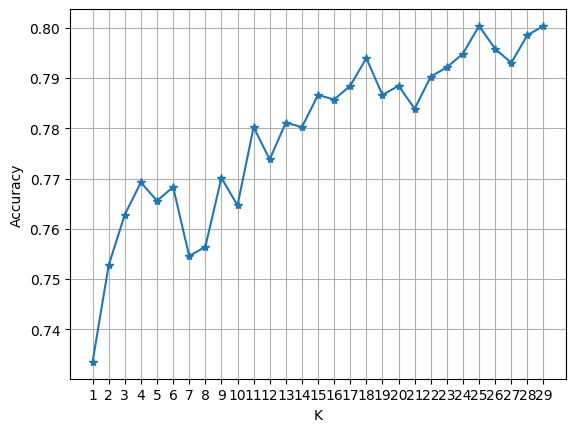

In [36]:
plt.plot(neighbors_range, accuracy_list,'*-')
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.xticks(neighbors_range)
plt.grid()

In [37]:
#taking k = 18
classifier_knn = KNeighborsClassifier(n_neighbors=25, metric='euclidean')
classifier_knn.fit(X_train,y_train)
y_pred_knn_eu = classifier_knn.predict(X_test)
acc_knn=accuracy_score(y_test,y_pred_knn_eu)
prec_knn=precision_score(y_test,y_pred_knn_eu)
rec_knn=recall_score(y_test,y_pred_knn_eu)
f1_knn=f1_score(y_test,y_pred_knn_eu)


In [38]:
print('Accuracy:',acc_knn)
print('Precision:',prec_knn)
print('Recall:',rec_knn)
print('F1 Score:',f1_knn)
confusion_matrix(y_test,y_pred_knn_eu)

Accuracy: 0.8003663003663004
Precision: 0.6411149825783972
Recall: 0.6153846153846154
F1 Score: 0.6279863481228669


array([[690, 103],
       [115, 184]])


###using manhatten

In [39]:
accuracy_list1 = []
neighbors_range1 = np.arange(1,30)

for k in neighbors_range:
  classifier1 = KNeighborsClassifier(n_neighbors=k , metric='minkowski',p=1)  # initialising classifier for iteration using manhattan p=1
  #Training the ML model
  classifier1.fit(X_train, y_train)
  y_pred_mn=classifier1.predict(X_test)  #predict using trained ML model
  acc1 = accuracy_score(y_test,y_pred_mn)  # evaluate the ML model
  accuracy_list1.append(acc1) #appending acc list with accuracy achieved for each value of k

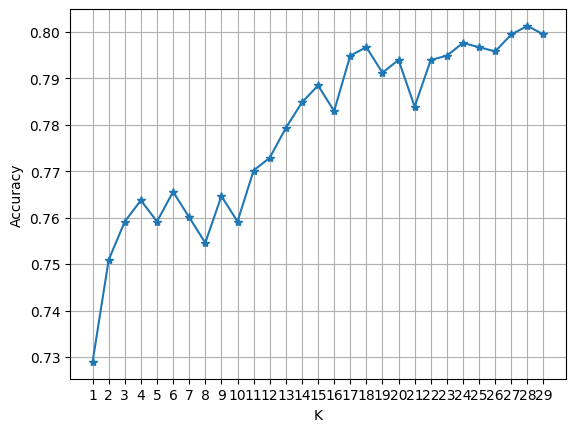

In [40]:
plt.plot(neighbors_range1, accuracy_list1,'*-')
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.xticks(neighbors_range1)
plt.grid()

In [41]:
classifier1_knn = KNeighborsClassifier(n_neighbors=28, metric='manhattan')
classifier1_knn.fit(X_train,y_train)
y_pred_knn_mn = classifier1_knn.predict(X_test)
acc_knn1=accuracy_score(y_test,y_pred_knn_mn)
prec_knn1=precision_score(y_test,y_pred_knn_mn)
rec_knn1=recall_score(y_test,y_pred_knn_mn)
f1_knn1=f1_score(y_test,y_pred_knn_mn)

In [42]:
print('Accuracy:',acc_knn1)
print('Precision:',prec_knn1)
print('Recall:',rec_knn1)
print('F1 Score:',f1_knn1)
confusion_matrix(y_test,y_pred_knn_mn)

Accuracy: 0.8012820512820513
Precision: 0.6529850746268657
Recall: 0.5852842809364549
F1 Score: 0.6172839506172839


array([[700,  93],
       [124, 175]])

###Nave bayes

In [43]:
#initializing the model
nb=GaussianNB()
#training the model
nb.fit(X_train,y_train)
#predict using trained ML model
y_pred_nb=nb.predict(X_test)
#evaluate the model
acc_nb=accuracy_score(y_test,y_pred_nb)
prec_nb=precision_score(y_test,y_pred_nb)
rec_nb=recall_score(y_test,y_pred_nb)
f1_nb=f1_score(y_test,y_pred_nb)

In [44]:
print('Accuracy:',acc_nb)
print('Precision:',prec_nb)
print('Recall:',rec_nb)
print('F1 Score:',f1_nb)
confusion_matrix(y_test,y_pred_nb)

Accuracy: 0.6996336996336996
Precision: 0.47442680776014107
Recall: 0.8996655518394648
F1 Score: 0.6212471131639723


array([[495, 298],
       [ 30, 269]])

###decision tree

In [45]:
#initializing the model
dt=DecisionTreeClassifier()
#training the model
dt.fit(X_train,y_train)
#predict using trained ML model
y_pred_dt=dt.predict(X_test)
#evaluate the model
acc_dt=accuracy_score(y_test,y_pred_dt)
prec_dt= precision_score(y_test,y_pred_dt)
rec_dt=recall_score(y_test,y_pred_dt)
f1_dt=f1_score(y_test,y_pred_dt)

In [46]:
print('Accuracy:',acc_dt)
print('Precision:',prec_dt)
print('Recall:',rec_dt)
print('F1 Score:',f1_dt)
confusion_matrix(y_test,y_pred_dt)

Accuracy: 0.7445054945054945
Precision: 0.5318471337579618
Recall: 0.5585284280936454
F1 Score: 0.5448613376835236


array([[646, 147],
       [132, 167]])

###SVM

In [47]:
svm_clf = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)
svm_clf.fit(X_train, y_train)
y_pred_sv = svm_clf.predict(X_test)


In [48]:
acc_sv=accuracy_score(y_test,y_pred_sv)
prec_sv= precision_score(y_test,y_pred_sv)
rec_sv=recall_score(y_test,y_pred_sv)
f1_sv=f1_score(y_test,y_pred_sv)

print('Accuracy:',acc_sv)
print('Precision:',prec_sv)
print('Recall:',rec_sv)
print('F1 Score:',f1_sv)
confusion_matrix(y_test,y_pred_sv)

Accuracy: 0.8012820512820513
Precision: 0.6846846846846847
Recall: 0.5083612040133779
F1 Score: 0.5834932821497121


array([[723,  70],
       [147, 152]])

#Logistic Regression Model Fine Tuning using Grid Search CV

In [76]:
lr1 = LogisticRegression(max_iter=1000)

param_grid_lr = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']
}

grid_lr = GridSearchCV(lr1, param_grid_lr, cv=5, scoring='roc_auc', n_jobs=-1)

grid_lr.fit(X_train, y_train)

best_lr = grid_lr.best_estimator_


In [77]:
y_pred_lr1 = best_lr.predict(X_test)
y_prob_lr = best_lr.predict_proba(X_test)[:, 1]

print("Best Params:", grid_lr.best_params_)
print("Accuracy:", accuracy_score(y_test, y_pred_lr1))
print("ROC-AUC:", roc_auc_score(y_test, y_prob_lr))

Best Params: {'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}
Accuracy: 0.8076923076923077
ROC-AUC: 0.8681776581880755


#Model feature Selection


In [81]:
rf = RandomForestClassifier(n_estimators=200,random_state=55)
rf.fit(X, y)

# Feature importance ranking
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf.feature_importances_
}).sort_values(by='Importance', ascending=False)

feature_importance.head(20)

,Feature,Importance
12,Tenure_Contract,0.113911
9,CLV,0.106678
7,MonthlyCharges,0.104936
10,AvgMonthlySpend,0.102019
8,TotalCharges,0.098076
4,tenure,0.083311
11,ContractWeight,0.047290
15,InternetService_Fiber optic,0.037225
32,PaymentMethod_Electronic check,0.024098
6,PaperlessBilling,0.018982


In [82]:
top_features = feature_importance['Feature'].head(20).tolist()

X_train_reduced= X_train[top_features]
X_test_reduced = X_test[top_features]

Performing Logistic Regression, KNN, DT, NV & SVM using reduced feature dataset

##1.Logistic Regression

In [83]:
lr1_red=LogisticRegression()
lr1_red.fit(X_train_reduced,y_train)

y_pred_lr_red=lr1_red.predict(X_test_reduced)

print(f'accuracy_score= {accuracy_score(y_test,y_pred_lr_red)}')
print(f'precision= {precision_score(y_test,y_pred_lr_red)}')
print(f'f1= {f1_score(y_test,y_pred_lr_red)}')
print(f'recall= {recall_score(y_test,y_pred_lr_red)}')
print(f'conf_matrix= {confusion_matrix(y_test,y_pred_lr_red)}')

accuracy_score= 0.8003663003663004
precision= 0.6784140969162996
f1= 0.5855513307984791
recall= 0.5150501672240803
conf_matrix= [[720  73]
 [145 154]]


In [84]:
lr_reduced = LogisticRegression(C=10,penalty='l1',solver='liblinear',max_iter=1000)

lr_reduced.fit(X_train_reduced, y_train)
y_pred_reduced = lr_reduced.predict(X_test_reduced)
y_prob_reduced = lr_reduced.predict_proba(X_test_reduced)[:, 1]

In [85]:
print("Accuracy:", accuracy_score(y_test, y_pred_reduced))
print("ROC-AUC:", roc_auc_score(y_test, y_prob_reduced))

Accuracy: 0.8012820512820513
ROC-AUC: 0.857465195038527


##2 KNN

In [86]:
accuracy_list3 = []
neighbors_range3 = np.arange(1,30)

for k in neighbors_range3:
  classifier3 = KNeighborsClassifier(n_neighbors=k , metric='minkowski',p=2)  # initialising classifier for iteration using Euclidian p=2
  #Training the ML model
  classifier3.fit(X_train_reduced, y_train)
  y_pred_eu_red=classifier3.predict(X_test_reduced)  #predict using trained ML model
  acc3 = accuracy_score(y_test,y_pred_eu_red)  # evaluate the ML model
  accuracy_list3.append(acc3) #appending acc list with accuracy achieved for each value of k

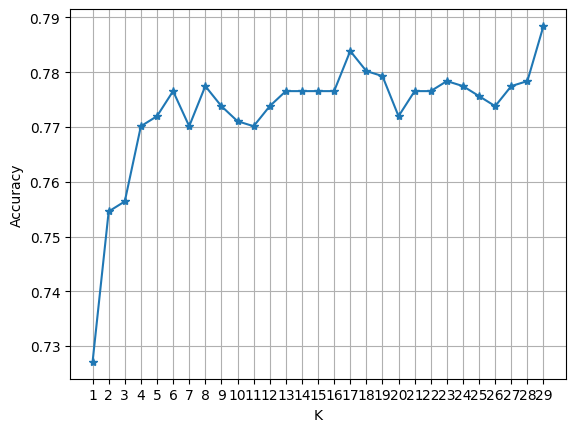

In [87]:
plt.plot(neighbors_range3, accuracy_list3,'*-')
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.xticks(neighbors_range3)
plt.grid()

In [88]:
classifier_knn3 = KNeighborsClassifier(n_neighbors=29, metric='euclidean')  #usking k=29
classifier_knn3.fit(X_train_reduced,y_train)
y_pred_knn_eu_red = classifier_knn3.predict(X_test_reduced)
acc_knn3=accuracy_score(y_test,y_pred_knn_eu_red)
prec_knn3=precision_score(y_test,y_pred_knn_eu_red)
rec_knn3=recall_score(y_test,y_pred_knn_eu_red)
f1_knn3=f1_score(y_test,y_pred_knn_eu_red)

In [89]:
print('Accuracy:',acc_knn3)
print('Precision:',prec_knn3)
print('Recall:',rec_knn3)
print('F1 Score:',f1_knn3)
confusion_matrix(y_test,y_pred_knn_eu_red)

Accuracy: 0.7884615384615384
Precision: 0.640495867768595
Recall: 0.5183946488294314
F1 Score: 0.5730129390018485


array([[706,  87],
       [144, 155]])

In [90]:
accuracy_list4 = []
neighbors_range4 = np.arange(1,30)

for k in neighbors_range4:
  classifier4 = KNeighborsClassifier(n_neighbors=k , metric='minkowski',p=1)  # initialising classifier for iteration using manhattan p=1
  #Training the ML model
  classifier4.fit(X_train_reduced, y_train)
  y_pred_mn_red=classifier4.predict(X_test_reduced)  #predict using trained ML model
  acc4 = accuracy_score(y_test,y_pred_mn_red)  # evaluate the ML model
  accuracy_list4.append(acc4) #appending acc list with accuracy achieved for each value of k

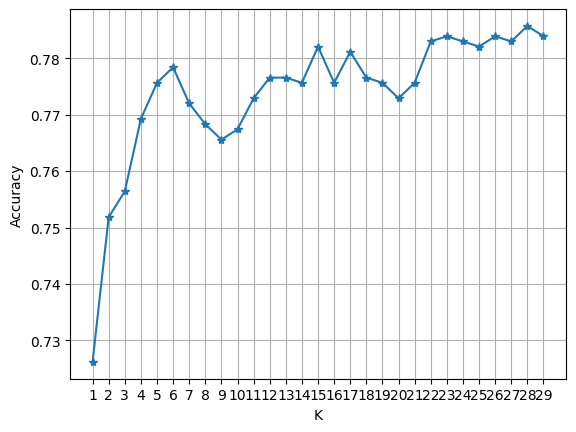

In [91]:
plt.plot(neighbors_range4, accuracy_list4,'*-')
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.xticks(neighbors_range4)
plt.grid()

In [92]:
classifier4_knn = KNeighborsClassifier(n_neighbors=27, metric='manhattan') #using k=27
classifier4_knn.fit(X_train_reduced,y_train)
y_pred_knn_mn_red = classifier4_knn.predict(X_test_reduced)
acc_knn4=accuracy_score(y_test,y_pred_knn_mn_red)
prec_knn4=precision_score(y_test,y_pred_knn_mn_red)
rec_knn4=recall_score(y_test,y_pred_knn_mn_red)
f1_knn4=f1_score(y_test,y_pred_knn_mn_red)

In [93]:
print('Accuracy:',acc_knn4)
print('Precision:',prec_knn4)
print('Recall:',rec_knn4)
print('F1 Score:',f1_knn4)
confusion_matrix(y_test,y_pred_knn_mn_red)

Accuracy: 0.782967032967033
Precision: 0.6270491803278688
Recall: 0.5117056856187291
F1 Score: 0.56353591160221


array([[702,  91],
       [146, 153]])

##3,Navie bayes

In [94]:
nb2=GaussianNB()
#training the model
nb2.fit(X_train_reduced,y_train)
#predict using trained ML model
y_pred_nb_red=nb2.predict(X_test_reduced)
#evaluate the model
acc_nb2=accuracy_score(y_test,y_pred_nb_red)
prec_nb2=precision_score(y_test,y_pred_nb_red)
rec_nb2=recall_score(y_test,y_pred_nb_red)
f1_nb2=f1_score(y_test,y_pred_nb_red)

In [95]:
print('Accuracy:',acc_nb2)
print('Precision:',prec_nb2)
print('Recall:',rec_nb2)
print('F1 Score:',f1_nb2)
confusion_matrix(y_test,y_pred_nb_red)

Accuracy: 0.6895604395604396
Precision: 0.46551724137931033
Recall: 0.903010033444816
F1 Score: 0.6143344709897611


array([[483, 310],
       [ 29, 270]])

#4, decision tree

In [96]:
#initializing the model
dt2=DecisionTreeClassifier()
#training the model
dt2.fit(X_train_reduced,y_train)
#predict using trained ML model
y_pred_dt_red=dt2.predict(X_test_reduced)
#evaluate the model
acc_dt2=accuracy_score(y_test,y_pred_dt_red)
prec_dt2= precision_score(y_test,y_pred_dt_red)
rec_dt2=recall_score(y_test,y_pred_dt_red)
f1_dt2=f1_score(y_test,y_pred_dt_red)

In [97]:
print('Accuracy:',acc_dt2)
print('Precision:',prec_dt2)
print('Recall:',rec_dt2)
print('F1 Score:',f1_dt2)
confusion_matrix(y_test,y_pred_dt_red)

Accuracy: 0.7261904761904762
Precision: 0.5
Recall: 0.5217391304347826
F1 Score: 0.5106382978723404


array([[637, 156],
       [143, 156]])

##5.SVM

In [98]:
svm_clf2 = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=55) ##initializing the model
svm_clf2.fit(X_train_reduced, y_train)  ##training the model
y_pred_sv_red = svm_clf2.predict(X_test_reduced)  ##predict using trained ML model

acc_sv2=accuracy_score(y_test,y_pred_sv_red)
prec_sv2= precision_score(y_test,y_pred_sv_red)
rec_sv2=recall_score(y_test,y_pred_sv_red)
f1_sv2=f1_score(y_test,y_pred_sv_red)


print('Accuracy:',acc_sv2)
print('Precision:',prec_sv2)
print('Recall:',rec_sv2)
print('F1 Score:',f1_sv2)
confusion_matrix(y_test,y_pred_sv_red)

Accuracy: 0.7948717948717948
Precision: 0.6829268292682927
Recall: 0.4682274247491639
F1 Score: 0.5555555555555556


array([[728,  65],
       [159, 140]])

#Choosing Logistic Regression modeling to perform Testing Dataset as it gives highest accuracy.

#loading testing data

In [49]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [50]:
filepath= '/content/drive/MyDrive/DSA ICT/Testing_data.csv'
t_d = pd.read_csv(filepath)
t_d.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,6080-TCMYC,Male,0,Yes,Yes,40,Yes,Yes,Fiber optic,No,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,81.20,3292.3,No
1,7285-KLOTR,Female,0,Yes,No,12,Yes,Yes,DSL,Yes,...,Yes,No,Yes,Yes,One year,No,Electronic check,78.85,876.75,No
2,7486-KSRVI,Male,0,No,No,43,Yes,Yes,Fiber optic,No,...,No,Yes,Yes,Yes,One year,Yes,Electronic check,100.00,4211.55,Yes
3,9924-JPRMC,Male,0,No,No,72,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Electronic check,118.20,8547.15,No
4,4439-YRNVD,Female,0,No,No,10,No,No phone service,DSL,No,...,No,Yes,No,No,Month-to-month,No,Electronic check,36.25,374,No


#Data cleaning

In [51]:
t_d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1409 entries, 0 to 1408
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        1409 non-null   object 
 1   gender            1409 non-null   object 
 2   SeniorCitizen     1409 non-null   int64  
 3   Partner           1409 non-null   object 
 4   Dependents        1409 non-null   object 
 5   tenure            1409 non-null   int64  
 6   PhoneService      1409 non-null   object 
 7   MultipleLines     1409 non-null   object 
 8   InternetService   1409 non-null   object 
 9   OnlineSecurity    1409 non-null   object 
 10  OnlineBackup      1409 non-null   object 
 11  DeviceProtection  1409 non-null   object 
 12  TechSupport       1409 non-null   object 
 13  StreamingTV       1409 non-null   object 
 14  StreamingMovies   1409 non-null   object 
 15  Contract          1409 non-null   object 
 16  PaperlessBilling  1409 non-null   object 


In [52]:
t_d.drop(columns=['customerID','Churn'],inplace = True)
t_d.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,Male,0,Yes,Yes,40,Yes,Yes,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,81.20,3292.3
1,Female,0,Yes,No,12,Yes,Yes,DSL,Yes,No,Yes,No,Yes,Yes,One year,No,Electronic check,78.85,876.75
2,Male,0,No,No,43,Yes,Yes,Fiber optic,No,No,No,Yes,Yes,Yes,One year,Yes,Electronic check,100.00,4211.55
3,Male,0,No,No,72,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Electronic check,118.20,8547.15
4,Female,0,No,No,10,No,No phone service,DSL,No,Yes,No,Yes,No,No,Month-to-month,No,Electronic check,36.25,374


In [53]:
t_d['TotalCharges'] = pd.to_numeric(t_d['TotalCharges'], errors='coerce')

In [54]:
#Handling duplicates
t_d.duplicated().sum()
t_d[t_d.duplicated()]
t_d = t_d.drop_duplicates()
t_d.duplicated().sum()
t_d.T.duplicated().sum()

np.int64(0)

In [55]:
#handling missing values
t_d.isnull().sum().sort_values(ascending=False)

,0
TotalCharges,2
SeniorCitizen,0
gender,0
Partner,0
Dependents,0
PhoneService,0
tenure,0
InternetService,0
OnlineSecurity,0
OnlineBackup,0


In [56]:
t_d = t_d.dropna(subset=['TotalCharges'])

In [57]:
t_d.isnull().sum().sort_values(ascending=False)

,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0
OnlineBackup,0


#feature engineering

In [58]:
t_d1=t_d.select_dtypes(include=['number'])
corr1=t_d1.corr()
corr1

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
SeniorCitizen,1.000000,-0.008254,0.248067,0.085013
tenure,-0.008254,1.000000,0.275773,0.831058
MonthlyCharges,0.248067,0.275773,1.000000,0.661694
TotalCharges,0.085013,0.831058,0.661694,1.000000


<Axes: >

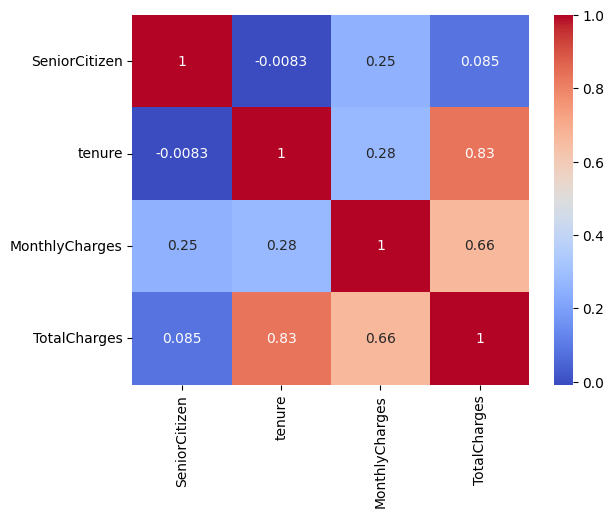

In [59]:
sns.heatmap(corr1,annot=True,cmap='coolwarm')

##adding new feature

In [60]:
t_d['CLV'] = t_d['tenure'] * t_d['MonthlyCharges']

In [61]:
t_d['AvgMonthlySpend'] = t_d['TotalCharges'] / (t_d['tenure'] + 1)

In [62]:
#tenure group
t_d['TenureGroup'] = pd.cut(
    t_d['tenure'],
    bins=[0, 12, 24, 48, 72],
    labels=['0-1yr', '1-2yr', '2-4yr', '4-6yr']
)

In [63]:
#tenure contract interaction
contract_weight = {
    'Month-to-month': 1,
    'One year': 12,
    'Two year': 24
}
t_d['ContractWeight'] = t_d['Contract'].map(contract_weight)
t_d['Tenure_Contract'] = t_d['tenure'] * t_d['ContractWeight']

In [64]:
t_d[['CLV', 'AvgMonthlySpend', 'TenureGroup','Tenure_Contract']].head()

,CLV,AvgMonthlySpend,TenureGroup,Tenure_Contract
0,3248.0,80.300000,2-4yr,40
1,946.2,67.442308,0-1yr,144
2,4300.0,95.717045,2-4yr,516
3,8510.4,117.084247,4-6yr,1728
4,362.5,34.000000,0-1yr,10


#Encoding

In [65]:
for col in t_d.columns:
    print(f"\nColumn: {col}")
    print(t_d[col].value_counts(dropna=False))



Column: gender
gender
Male      720
Female    684
Name: count, dtype: int64

Column: SeniorCitizen
SeniorCitizen
0    1162
1     242
Name: count, dtype: int64

Column: Partner
Partner
No     748
Yes    656
Name: count, dtype: int64

Column: Dependents
Dependents
No     970
Yes    434
Name: count, dtype: int64

Column: tenure
tenure
1     136
72     60
2      50
3      46
71     37
     ... 
56     10
33     10
41      8
44      8
36      6
Name: count, Length: 72, dtype: int64

Column: PhoneService
PhoneService
Yes    1275
No      129
Name: count, dtype: int64

Column: MultipleLines
MultipleLines
No                  684
Yes                 591
No phone service    129
Name: count, dtype: int64

Column: InternetService
InternetService
Fiber optic    608
DSL            476
No             320
Name: count, dtype: int64

Column: OnlineSecurity
OnlineSecurity
No                     690
Yes                    394
No internet service    320
Name: count, dtype: int64

Column: OnlineBackup
Onlin

In [66]:
t_d.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1404 entries, 0 to 1408
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   gender            1404 non-null   object  
 1   SeniorCitizen     1404 non-null   int64   
 2   Partner           1404 non-null   object  
 3   Dependents        1404 non-null   object  
 4   tenure            1404 non-null   int64   
 5   PhoneService      1404 non-null   object  
 6   MultipleLines     1404 non-null   object  
 7   InternetService   1404 non-null   object  
 8   OnlineSecurity    1404 non-null   object  
 9   OnlineBackup      1404 non-null   object  
 10  DeviceProtection  1404 non-null   object  
 11  TechSupport       1404 non-null   object  
 12  StreamingTV       1404 non-null   object  
 13  StreamingMovies   1404 non-null   object  
 14  Contract          1404 non-null   object  
 15  PaperlessBilling  1404 non-null   object  
 16  PaymentMethod     1404 non-nu

##Binary encode

In [67]:
binary1_cols = ['gender', 'Partner', 'Dependents', 'PhoneService','PaperlessBilling']

for col in binary1_cols:
    t_d[col] = t_d[col].map({'Yes': 1, 'No': 0, 'Male': 1, 'Female': 0})
t_d.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1404 entries, 0 to 1408
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   gender            1404 non-null   int64   
 1   SeniorCitizen     1404 non-null   int64   
 2   Partner           1404 non-null   int64   
 3   Dependents        1404 non-null   int64   
 4   tenure            1404 non-null   int64   
 5   PhoneService      1404 non-null   int64   
 6   MultipleLines     1404 non-null   object  
 7   InternetService   1404 non-null   object  
 8   OnlineSecurity    1404 non-null   object  
 9   OnlineBackup      1404 non-null   object  
 10  DeviceProtection  1404 non-null   object  
 11  TechSupport       1404 non-null   object  
 12  StreamingTV       1404 non-null   object  
 13  StreamingMovies   1404 non-null   object  
 14  Contract          1404 non-null   object  
 15  PaperlessBilling  1404 non-null   int64   
 16  PaymentMethod     1404 non-nu

##One hot encoding



In [68]:
t_d = pd.get_dummies(t_d, columns = onehot_cols, drop_first=True,dtype=int)

#Scaling

##min max encoding

In [69]:
t_d[scale_cols] = scaler.fit_transform(t_d[scale_cols])

In [70]:
t_d.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,CLV,...,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,TenureGroup_1-2yr,TenureGroup_2-4yr,TenureGroup_4-6yr
0,1,0.0,1,1,0.549296,1,1,0.625626,0.383837,0.380282,...,0,0,0,0,0,1,0,0,1,0
1,0,0.0,1,0,0.154930,1,0,0.602102,0.100600,0.109214,...,0,1,1,0,0,1,0,0,0,0
2,1,0.0,0,0,0.591549,1,1,0.813814,0.491625,0.504169,...,0,1,1,0,0,1,0,0,1,0
3,1,0.0,0,0,1.000000,1,1,0.995996,1.000000,1.000000,...,0,1,0,1,0,1,0,0,0,1
4,0,0.0,0,0,0.126761,0,0,0.175676,0.041649,0.040475,...,0,0,0,0,0,1,0,0,0,0


In [71]:
t_d.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1404 entries, 0 to 1408
Data columns (total 37 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   gender                                 1404 non-null   int64  
 1   SeniorCitizen                          1404 non-null   float64
 2   Partner                                1404 non-null   int64  
 3   Dependents                             1404 non-null   int64  
 4   tenure                                 1404 non-null   float64
 5   PhoneService                           1404 non-null   int64  
 6   PaperlessBilling                       1404 non-null   int64  
 7   MonthlyCharges                         1404 non-null   float64
 8   TotalCharges                           1404 non-null   float64
 9   CLV                                    1404 non-null   float64
 10  AvgMonthlySpend                        1404 non-null   float64
 11  ContractW

#ML Modeling using fine tuned Logistic Regression


In [99]:
y_pred_t_d=best_lr.predict(t_d)


In [100]:
from sklearn.metrics import classification_report, roc_auc_score

y_pred = best_lr.predict(X_test)
y_prob = best_lr.predict_proba(X_test)[:, 1]

print(classification_report(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, y_prob))

              precision    recall  f1-score   support

           0       0.84      0.90      0.87       793
           1       0.68      0.55      0.61       299

    accuracy                           0.81      1092
   macro avg       0.76      0.73      0.74      1092
weighted avg       0.80      0.81      0.80      1092

ROC-AUC Score: 0.8681776581880755


In [101]:
import pandas as pd
import numpy as np

coef_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': best_lr.coef_[0]
})

coef_df['Absolute_Coefficient'] = np.abs(coef_df['Coefficient'])
coef_df = coef_df.sort_values(by='Absolute_Coefficient', ascending=False)

coef_df.head(10)

,Feature,Coefficient,Absolute_Coefficient
4,tenure,-3.533292,3.533292
11,ContractWeight,-2.366259,2.366259
12,Tenure_Contract,1.492044,1.492044
15,InternetService_Fiber optic,0.790876,0.790876
27,StreamingMovies_No internet service,-0.599193,0.599193
36,TenureGroup_4-6yr,0.568154,0.568154
5,PhoneService,-0.383966,0.383966
9,CLV,0.370619,0.370619
18,OnlineSecurity_Yes,-0.340950,0.340950
6,PaperlessBilling,0.286004,0.286004
